In [1]:
from setup import * #gets the real data

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:32: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag = pd.read_csv(z.open(member_name))
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education=df_.Q4.replace({'Master’s degree': 18,
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjEx

In [13]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, dummy, preprocessing, ensemble, model_selection
import xgboost as xgb
import dtreeviz
import yellowbrick.model_selection as ms
#also, must install graphviz for plotting to work with xgb

In this section, we will experiment with different hyperparameters and see how they improve the model. Note, we can just pass `yellowbrick.model_selection` the parameters we want to vary.
- Question: can you pass yellowbrick multiple?
- Explore regularization parameters (1) `gamma`, (2) `learning_rate`
    - `gamma`: default 0. aka `min_split_loss` It's regularization. Prune trees to remove spilts that don't meet the given value.
        - isn't this very similar to another one? Maybe I looked up min_split_loss before and its this

In [3]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
xg.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## Messing with Gamma, a constraint on improvement in the loss function to improve a node

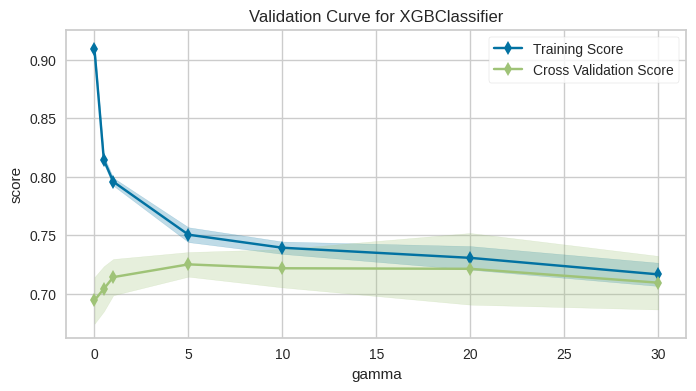

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for XGBClassifier'}, xlabel='gamma', ylabel='score'>,
                estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=No...
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=None,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=None, ...),
                n_jobs=-1, param_name='gamma',
                param_range=array([ 0. ,  0.5,  1. ,  5. , 10. , 20. , 30. ]))

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
ms.validation_curve(xgb.XGBClassifier(), X_train, y_train, param_name='gamma',\
                    param_range=[0,.5,1,5,10,20,30], n_jobs=-1, ax=ax)

## Messing with the Learning Rate

**Suggestion is to tune it last!** Combine it with early stopping and a large number of trees! If early stopping doesn't kick in, raise the number of trees.

In [9]:
# very high learning rate
xgb_lr1 = xgb.XGBClassifier(learning_rate=1, max_depth=2)
xgb_lr1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: >

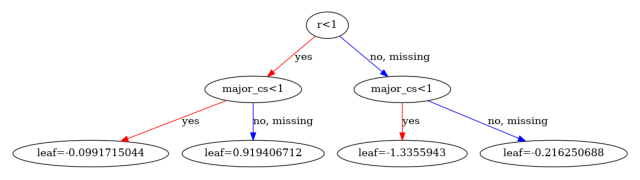

In [10]:
xgb.plot_tree(xgb_lr1,num_trees=0)

In [11]:
xg_lr001 = xgb.XGBClassifier(learning_rate=.001, max_depth=2)
xg_lr001.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: >

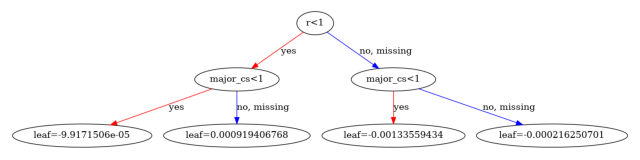

In [12]:
xgb.plot_tree(xg_lr001) #values are all very close to 0 now! It doesn't look like it converged!

## Grid Search
- Multiple hyperparameters, some of which interact with other hyperparameters
- How do we know which combination is best?
- We can try various combos and explore which performs the best
- scikit-learn's `GridSearchCV` does this
- `n_jobs` is the number of jobs to run in parallel

In [15]:
from sklearn import model_selection
params = {'reg_lambda':[0],
          'learning_rate':[.1,.3],
          'subsample':[.7,1],
          'max_depth':[2,3],
          'random_state':[42],
          'n_jobs':[-1],
          'n_estimators': [200]}

xgb2 = xgb.XGBClassifier(early_stopping_rounds=5)
cv = (model_selection.GridSearchCV(xgb2, params, cv=3, n_jobs=-1)
    .fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose=50 )
)


[0]	validation_0-logloss:0.67231
[0]	validation_0-logloss:0.67135
[50]	validation_0-logloss:0.52123
[50]	validation_0-logloss:0.52443
[94]	validation_0-logloss:0.51318
[92]	validation_0-logloss:0.51469
[0]	validation_0-logloss:0.67029
[50]	validation_0-logloss:0.51993
[98]	validation_0-logloss:0.50387
[0]	validation_0-logloss:0.67129
[0]	validation_0-logloss:0.67271
[50]	validation_0-logloss:0.52728
[50]	validation_0-logloss:0.53011
[72]	validation_0-logloss:0.52139
[0]	validation_0-logloss:0.67119
[83]	validation_0-logloss:0.52163
[50]	validation_0-logloss:0.52347
[100]	validation_0-logloss:0.51099
[150]	validation_0-logloss:0.50439
[159]	validation_0-logloss:0.50387
[0]	validation_0-logloss:0.66824
[50]	validation_0-logloss:0.51478
[0]	validation_0-logloss:0.66679
[77]	validation_0-logloss:0.51059
[0]	validation_0-logloss:0.66686
[50]	validation_0-logloss:0.51443
[50]	validation_0-logloss:0.50235
[75]	validation_0-logloss:0.49891
[74]	validation_0-logloss:0.50785
[0]	validation_0-log

In [16]:
cv.best_params_

{'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 42,
 'reg_lambda': 0,
 'subsample': 0.7}

In [17]:
type(cv.best_params_)

dict

In [18]:
params = cv.best_params_

In [19]:
xgb_grid = xgb.XGBClassifier(**params, early_stopping_rounds=50) #so you can provide a dictionary of params and still more
    # using essentially both **kwargs and direct parameter styles.
xgb_grid.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=10) # so print every 10 trials

[0]	validation_0-logloss:0.63310	validation_1-logloss:0.63186
[10]	validation_0-logloss:0.52220	validation_1-logloss:0.52094
[20]	validation_0-logloss:0.49932	validation_1-logloss:0.51191
[30]	validation_0-logloss:0.48593	validation_1-logloss:0.51050
[40]	validation_0-logloss:0.47686	validation_1-logloss:0.51356
[50]	validation_0-logloss:0.46643	validation_1-logloss:0.51059
[60]	validation_0-logloss:0.45991	validation_1-logloss:0.51154
[70]	validation_0-logloss:0.45336	validation_1-logloss:0.51273
[77]	validation_0-logloss:0.44919	validation_1-logloss:0.51554


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [20]:
xgb_def = xgb.XGBClassifier(early_stopping_rounds=50) #training the default model
xgb_def.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-logloss:0.61261	validation_1-logloss:0.61414
[1]	validation_0-logloss:0.56839	validation_1-logloss:0.57589
[2]	validation_0-logloss:0.54035	validation_1-logloss:0.55089
[3]	validation_0-logloss:0.52087	validation_1-logloss:0.53628
[4]	validation_0-logloss:0.50741	validation_1-logloss:0.52823
[5]	validation_0-logloss:0.49627	validation_1-logloss:0.52017
[6]	validation_0-logloss:0.48585	validation_1-logloss:0.51492
[7]	validation_0-logloss:0.47578	validation_1-logloss:0.51189
[8]	validation_0-logloss:0.46796	validation_1-logloss:0.50871
[9]	validation_0-logloss:0.45895	validation_1-logloss:0.50563
[10]	validation_0-logloss:0.45405	validation_1-logloss:0.50672
[11]	validation_0-logloss:0.44478	validation_1-logloss:0.50460
[12]	validation_0-logloss:0.44074	validation_1-logloss:0.50578
[13]	validation_0-logloss:0.43717	validation_1-logloss:0.50422
[14]	validation_0-logloss:0.42943	validation_1-logloss:0.50359
[15]	validation_0-logloss:0.42615	validation_1-logloss:0.50360
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
xgb_def.score(X_test, y_test), xgb_grid.score(X_test, y_test)

(0.7602209944751381, 0.7491712707182321)

Lol, the default did better! Just goes to show...

In [23]:
X

,age,education,years_exp,compensation,python,r,sql,Q1_Male,Q1_Female,Q1_Prefer not to say,Q1_Prefer to self-describe,Q3_United States of America,Q3_India,Q3_China,major_cs,major_other,major_eng,major_stat
587,25,18.0,4.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0
3065,22,16.0,1.0,10000,1,0,0,1,0,0,0,0,1,0,1,0,0,0
8435,22,18.0,1.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3110,40,20.0,3.0,125000,1,0,1,0,1,0,0,1,0,0,0,1,0,0
16372,45,12.0,5.0,100000,1,0,1,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11457,25,18.0,3.0,50000,1,1,0,1,0,0,0,0,0,1,0,0,0,1
4707,18,16.0,0.0,100000,1,0,1,1,0,0,0,1,0,0,1,0,0,0
18587,40,19.0,15.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3091,30,16.0,2.0,100000,1,1,1,1,0,0,0,1,0,0,0,1,0,0


In [24]:
results_default = model_selection.cross_val_score(xgb.XGBClassifier(),X=X, y=y, cv=4)

In [25]:
results_default

array([0.70159151, 0.71883289, 0.68965517, 0.7250996 ])

In [26]:
results_default.mean()

0.7087947942976107

In [27]:
results_grid = model_selection.cross_val_score(xgb.XGBClassifier(**params),X=X, y=y, cv=4)

In [28]:
results_grid

array([0.71750663, 0.72281167, 0.73209549, 0.72775564])

In [29]:
results_grid.mean()

0.7250423592984385

Can confirm that the grid model actually did do better on the training data's cross validation holdout groups. Just, not on the test. What can you do? Maybe something unusual about the test data.